In [1]:
## Cargamos nuestras librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import jinja2
from pycaret.classification import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
sns.set()

In [2]:
data = pd.read_csv('Ingreso.csv')
data.rename(columns={'Cód. Institución':'Cód_Institución','Nombre Institución':'Nombre_Institución','Tipo Institución':'Tipo_Institución',
                     'Matrícula_total_hombres':'Matrícula_total_hombres','Clasificación1':'Universidades','Clasificación3':'Acreditacion',
                     'Clasificación5':'Gratuidad','Matrícula total hombres':'Matrícula_total_hombres','Matrícula total mujeres':'Matrícula_total_mujeres','Nombre Region':'Nombre_Region',
                     'Area Conocimiento':'Area_Conocimiento','Carrera Genérica':'Carrera_Genérica','Máximo Puntaje (promedio matemáticas y lenguaje)':'Máximo_Puntaje',
                     'Puntaje de corte (promedio de la carrera)':'Puntaje_de_corte'},inplace=True)
data.head()

,Año,Cód_Institución,Nombre_Institución,Tipo_Institución,Universidades,Acreditacion,Gratuidad,Matrícula_total_hombres,Matrícula_total_mujeres,Nombre_Region,Area_Conocimiento,Carrera_Genérica,Máximo_Puntaje,Puntaje_de_corte
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,291,401,Región Metropolitana,Administración y Comercio,Administración pública y similares,779.0,660.0
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,178,204,Región Metropolitana,Administración y Comercio,"Contabilidad, Auditoría y similares",744.0,680.0
2,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,1480,1054,Región Metropolitana,Administración y Comercio,Ingeniería Comercial,792.0,718.0
3,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,386,355,Región Metropolitana,Administración y Comercio,Ingeniería en Control de Gestión y similares,779.0,677.0
4,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,378,273,Región Metropolitana,"Agricultura, Silvicultura, Pesca y Veterinaria",Ingeniería Agronómica,774.0,657.0


In [3]:
data=data.dropna(subset=['Máximo_Puntaje','Puntaje_de_corte'])
data.isnull().sum()

Año                        0
Cód_Institución            0
Nombre_Institución         0
Tipo_Institución           0
Universidades              0
Acreditacion               0
Gratuidad                  0
Matrícula_total_hombres    0
Matrícula_total_mujeres    0
Nombre_Region              0
Area_Conocimiento          0
Carrera_Genérica           0
Máximo_Puntaje             0
Puntaje_de_corte           0
dtype: int64

In [4]:
data['Clasificacion_de_puntajes']=''

In [5]:
data.loc[data['Máximo_Puntaje'] < 400,'Clasificacion_de_puntajes']= "< 400"
data.loc[(data['Máximo_Puntaje'] >= 400)&(data['Máximo_Puntaje'] < 500),'Clasificacion_de_puntajes']= "400 - 499"
data.loc[(data['Máximo_Puntaje'] >= 500)&(data['Máximo_Puntaje'] < 600),'Clasificacion_de_puntajes']= "500 - 599"
data.loc[(data['Máximo_Puntaje'] >= 600)&(data['Máximo_Puntaje'] < 700),'Clasificacion_de_puntajes']= "600 - 699"
data.loc[(data['Máximo_Puntaje'] >= 700)&(data['Máximo_Puntaje'] < 850),'Clasificacion_de_puntajes']= "700 - 849"
data.loc[(data['Máximo_Puntaje'] >= 850) ,'Clasificacion_de_puntajes']= "850"

In [6]:
data.head()

,Año,Cód_Institución,Nombre_Institución,Tipo_Institución,Universidades,Acreditacion,Gratuidad,Matrícula_total_hombres,Matrícula_total_mujeres,Nombre_Region,Area_Conocimiento,Carrera_Genérica,Máximo_Puntaje,Puntaje_de_corte,Clasificacion_de_puntajes
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,291,401,Región Metropolitana,Administración y Comercio,Administración pública y similares,779.0,660.0,700 - 849
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,178,204,Región Metropolitana,Administración y Comercio,"Contabilidad, Auditoría y similares",744.0,680.0,700 - 849
2,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,1480,1054,Región Metropolitana,Administración y Comercio,Ingeniería Comercial,792.0,718.0,700 - 849
3,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,386,355,Región Metropolitana,Administración y Comercio,Ingeniería en Control de Gestión y similares,779.0,677.0,700 - 849
4,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,378,273,Región Metropolitana,"Agricultura, Silvicultura, Pesca y Veterinaria",Ingeniería Agronómica,774.0,657.0,700 - 849


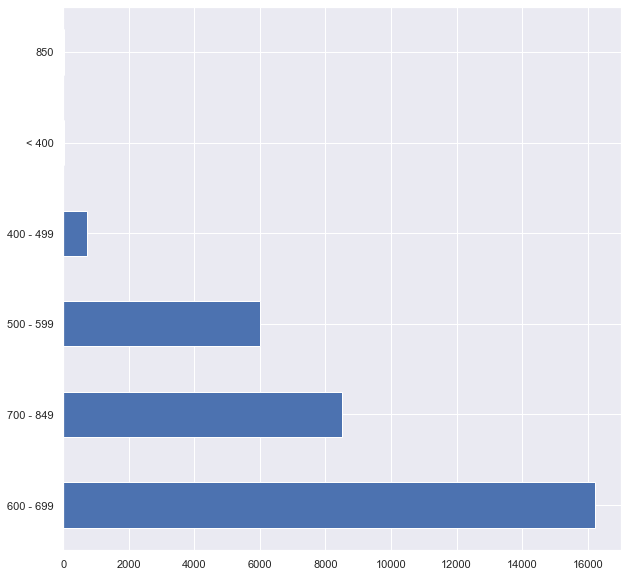

In [7]:
data['Clasificacion_de_puntajes'].value_counts().plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

Text(0.5, 1.0, 'No. Clientes')

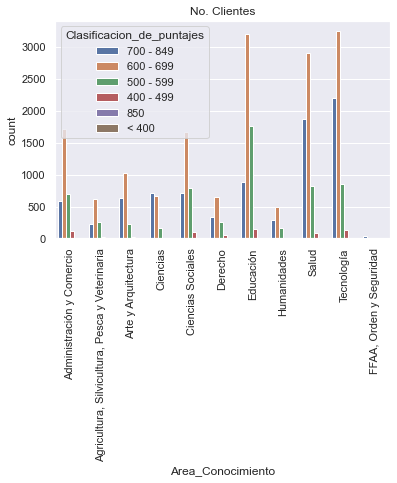

In [8]:
sns.countplot(x='Area_Conocimiento',data = data,hue='Clasificacion_de_puntajes')
plt.xticks(rotation=90)
plt.title("No. Clientes")

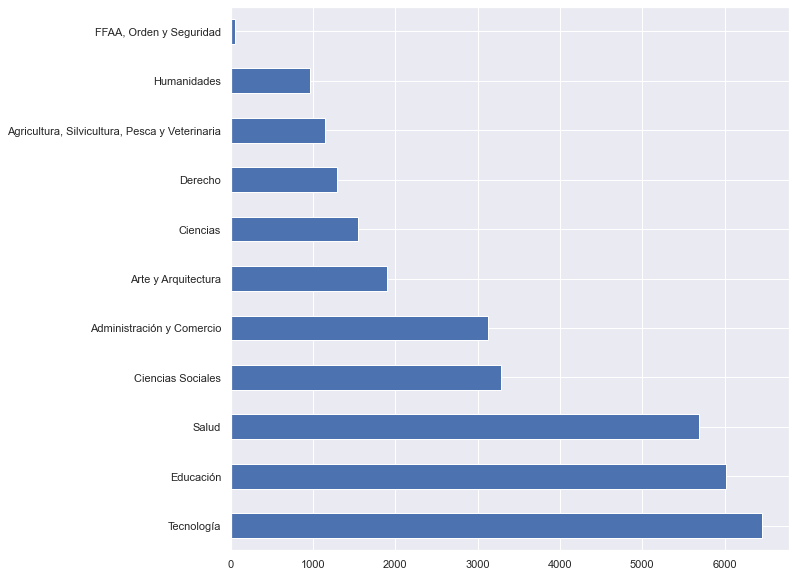

In [9]:
data['Area_Conocimiento'].value_counts().plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

Text(0.5, 1.0, 'Puntajes de la PSU en Regiones')

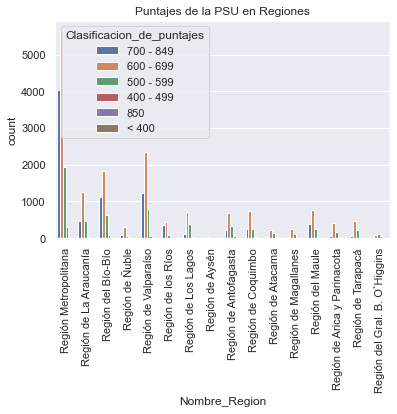

In [10]:
sns.countplot(x='Nombre_Region',data = data,hue='Clasificacion_de_puntajes')
plt.xticks(rotation=90)
plt.title("Puntajes de la PSU en Regiones")

Text(0.5, 1.0, 'Carrera Genérica')

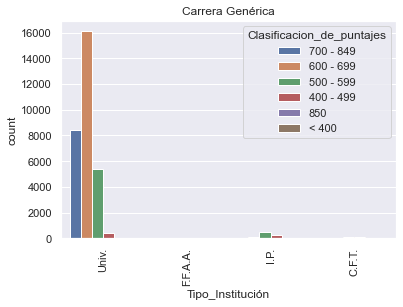

In [11]:
sns.countplot(x='Tipo_Institución',data = data,hue='Clasificacion_de_puntajes')
plt.xticks(rotation=90)
plt.title("Carrera Genérica")

In [12]:
train_data=data.sample(frac=0.90,random_state=345)
test_data=data.drop(train_data.index)
train_data.reset_index(inplace=True,drop=True)
test_data.reset_index(inplace=True,drop=True)

In [13]:
#print the number of word and column of the new data set
print('Data used to train the model has ' +str(train_data.shape[0])+' rows and '+str(train_data.shape[1])+' columns')
print('unseen Data used test for making predictions or classifications has ' +str(test_data.shape[0])+' rows and '+str(test_data.shape[1])+' columns')

Data used to train the model has 28321 rows and 15 columns
unseen Data used test for making predictions or classifications has 3147 rows and 15 columns


In [14]:
test_data.head()

,Año,Cód_Institución,Nombre_Institución,Tipo_Institución,Universidades,Acreditacion,Gratuidad,Matrícula_total_hombres,Matrícula_total_mujeres,Nombre_Region,Area_Conocimiento,Carrera_Genérica,Máximo_Puntaje,Puntaje_de_corte,Clasificacion_de_puntajes
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,31,84,Región Metropolitana,Arte y Arquitectura,Arte y similares,694.0,646.0,600 - 699
1,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,133,22,Región Metropolitana,Ciencias,"Física, Astronomía y similares",731.0,715.0,700 - 849
2,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,36,38,Región Metropolitana,Ciencias,Química y carreras similares,659.0,638.0,600 - 699
3,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,242,561,Región Metropolitana,Ciencias Sociales,Psicología,779.0,748.0,700 - 849
4,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,248,270,Región Metropolitana,Ciencias Sociales,Sociología,766.0,689.0,700 - 849


In [15]:
testing = pd.get_dummies(test_data, columns=['Tipo_Institución', 'Universidades', 'Acreditacion', 'Gratuidad'])
testing.drop('Máximo_Puntaje', axis=1, inplace=True)
testing.drop('Puntaje_de_corte', axis=1, inplace=True)


final_test = testing
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Año                                             3147 non-null   int64 
 1   Cód_Institución                                 3147 non-null   int64 
 2   Nombre_Institución                              3147 non-null   object
 3   Matrícula_total_hombres                         3147 non-null   int64 
 4   Matrícula_total_mujeres                         3147 non-null   int64 
 5   Nombre_Region                                   3147 non-null   object
 6   Area_Conocimiento                               3147 non-null   object
 7   Carrera_Genérica                                3147 non-null   object
 8   Clasificacion_de_puntajes                       3147 non-null   object
 9   Tipo_Institución_C.F.T.                         3147

In [16]:
from pycaret.classification import *
s = setup(data = final_test, target= 'Clasificacion_de_puntajes',  fold_shuffle=True, session_id=345)

,Description,Value
0,session_id,345
1,Target,Clasificacion_de_puntajes
2,Target Type,Multiclass
3,Label Encoded,"400 - 499: 0, 500 - 599: 1, 600 - 699: 2, 700 - 849: 3, < 400: 4"
4,Original Data,"(3147, 22)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [17]:
model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6812,0.0000,0.5356,0.6826,0.6733,0.4704,0.4765,1.1570
rf,Random Forest Classifier,0.6767,0.0000,0.5250,0.6792,0.6674,0.4588,0.4672,0.0810
xgboost,Extreme Gradient Boosting,0.6766,0.0000,0.5394,0.6752,0.6689,0.4647,0.4692,1.1170
gbc,Gradient Boosting Classifier,0.6703,0.0000,0.5145,0.6710,0.6611,0.4494,0.4568,0.5640
et,Extra Trees Classifier,0.6567,0.0000,0.5280,0.6562,0.6508,0.4347,0.4386,0.5400
lightgbm,Light Gradient Boosting Machine,0.6535,0.0000,0.4942,0.6526,0.6465,0.4291,0.4330,0.1340
ridge,Ridge Classifier,0.6480,0.0000,0.4924,0.6449,0.6352,0.4058,0.4146,0.0200
lda,Linear Discriminant Analysis,0.6457,0.0000,0.4743,0.6452,0.6417,0.4214,0.4241,0.0370
lr,Logistic Regression,0.6390,0.0000,0.4559,0.6376,0.6221,0.3825,0.3968,1.1580
dt,Decision Tree Classifier,0.6022,0.0000,0.4999,0.6039,0.6022,0.3680,0.3684,0.0210


In [19]:
#create Logistic Regression model
forest= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6561,0.0000,0.4411,0.6569,0.6285,0.3969,0.4248
1,0.6154,0.0000,0.3470,0.6019,0.6009,0.3561,0.3628
2,0.6273,0.0000,0.4443,0.6164,0.6169,0.3787,0.3831
3,0.6500,0.0000,0.4978,0.6441,0.6404,0.4155,0.4202
4,0.5955,0.0000,0.3200,0.5889,0.5770,0.2999,0.3120
5,0.6636,0.0000,0.5663,0.6634,0.6556,0.4366,0.4437
6,0.6455,0.0000,0.5432,0.6484,0.6324,0.3970,0.4100
7,0.6182,0.0000,0.4370,0.6284,0.5911,0.3299,0.3509
8,0.6500,0.0000,0.5178,0.6561,0.6399,0.4063,0.4167
9,0.6682,0.0000,0.4451,0.6715,0.6379,0.4082,0.4438


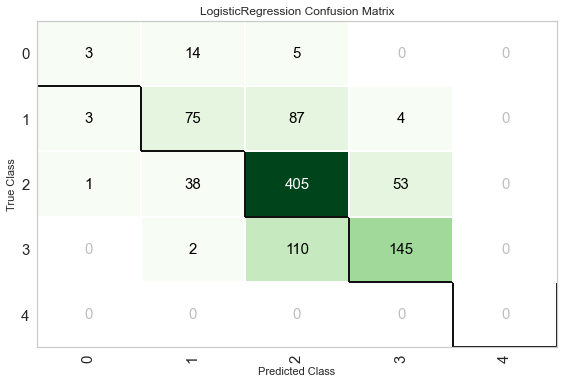

In [20]:
#plot the confusion matrix
plot_model(forest,plot='confusion_matrix')

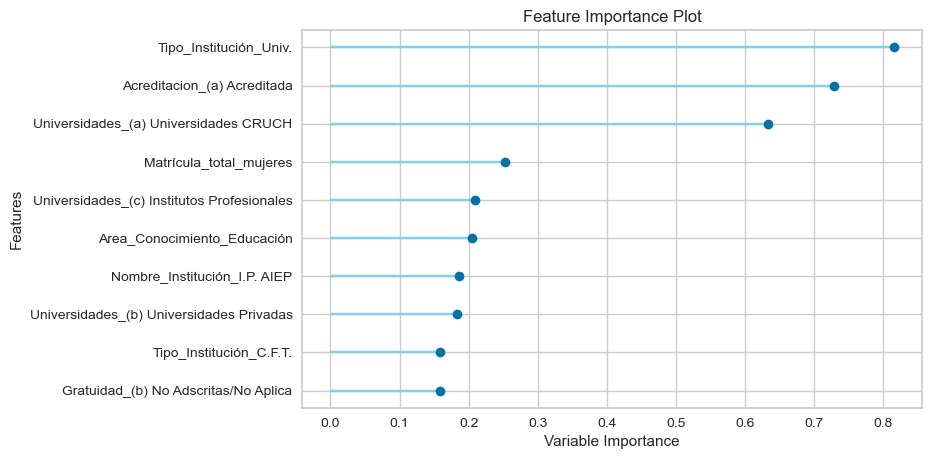

In [21]:
#plot the feature importance
plot_model(forest,plot='feature')

In [22]:
#evaluate the model
evaluate_model(forest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
#show the models predictions on the test data
predictions = predict_model(forest, data= final_test)
predictions.head(8)

,Año,Cód_Institución,Nombre_Institución,Matrícula_total_hombres,Matrícula_total_mujeres,Nombre_Region,Area_Conocimiento,Carrera_Genérica,Clasificacion_de_puntajes,Tipo_Institución_C.F.T.,...,Universidades_(b) Universidades Privadas,Universidades_(c) Institutos Profesionales,Universidades_(d) Centros de Formación Técnica,Universidades_(f) F.F.A.A.,Acreditacion_(a) Acreditada,Acreditacion_(b) No Acreditada,Gratuidad_(a) Adscritas a Gratuidad,Gratuidad_(b) No Adscritas/No Aplica,Label,Score
0,2022,1001,U. DE CHILE,31,84,Región Metropolitana,Arte y Arquitectura,Arte y similares,600 - 699,0,...,0,0,0,0,1,0,1,0,700 - 849,0.7019
1,2022,1001,U. DE CHILE,133,22,Región Metropolitana,Ciencias,"Física, Astronomía y similares",700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.9100
2,2022,1001,U. DE CHILE,36,38,Región Metropolitana,Ciencias,Química y carreras similares,600 - 699,0,...,0,0,0,0,1,0,1,0,700 - 849,0.7694
3,2022,1001,U. DE CHILE,242,561,Región Metropolitana,Ciencias Sociales,Psicología,700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.9286
4,2022,1001,U. DE CHILE,248,270,Región Metropolitana,Ciencias Sociales,Sociología,700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.9049
5,2022,1001,U. DE CHILE,67,30,Región Metropolitana,Educación,Pedagogía en Música,700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.5539
6,2022,1001,U. DE CHILE,65,232,Región Metropolitana,Salud,Nutrición y Dietética,700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.8060
7,2022,1001,U. DE CHILE,340,570,Región Metropolitana,Salud,Odontología,700 - 849,0,...,0,0,0,0,1,0,1,0,700 - 849,0.9800


In [28]:
data.head(1)

,Año,Cód_Institución,Nombre_Institución,Tipo_Institución,Universidades,Acreditacion,Gratuidad,Matrícula_total_hombres,Matrícula_total_mujeres,Nombre_Region,Area_Conocimiento,Carrera_Genérica,Máximo_Puntaje,Puntaje_de_corte,Clasificacion_de_puntajes
0,2022,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Acreditada,(a) Adscritas a Gratuidad,291,401,Región Metropolitana,Administración y Comercio,Administración pública y similares,779.0,660.0,700 - 849


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31468 entries, 0 to 167232
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        31468 non-null  int64  
 1   Cód_Institución            31468 non-null  int64  
 2   Nombre_Institución         31468 non-null  object 
 3   Tipo_Institución           31468 non-null  object 
 4   Universidades              31468 non-null  object 
 5   Acreditacion               31468 non-null  object 
 6   Gratuidad                  31468 non-null  object 
 7   Matrícula_total_hombres    31468 non-null  int64  
 8   Matrícula_total_mujeres    31468 non-null  int64  
 9   Nombre_Region              31468 non-null  object 
 10  Area_Conocimiento          31468 non-null  object 
 11  Carrera_Genérica           31468 non-null  object 
 12  Máximo_Puntaje             31468 non-null  float64
 13  Puntaje_de_corte           31468 non-null  fl

In [48]:
from sklearn.preprocessing import LabelEncoder
data['Región']=LabelEncoder().fit_transform(data['Nombre_Region'])
data['Carrera']=LabelEncoder().fit_transform(data['Carrera_Genérica'])
data['Institución']=LabelEncoder().fit_transform(data['Tipo_Institución'])

In [36]:
#Estimación del modelo de Regresión Lineal
#Especificamos la formula de nuestro modelo
formula= 'Máximo_Puntaje ~ C(Tipo_Institución) + C(Nombre_Region) + C(Acreditacion) + Matrícula_total_mujeres + Matrícula_total_hombres'

In [37]:
#Implementamos el modelo
modelo1= smf.ols(formula=formula, data=data)
#Ajuste del modelo
res= modelo1.fit()
#Resumen del modelo
print(res.summary())

#Cual podría ser el error de nuestro modelo?? error tipo 2

                            OLS Regression Results                            
Dep. Variable:         Máximo_Puntaje   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     697.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:32:28   Log-Likelihood:            -1.7355e+05
No. Observations:               31468   AIC:                         3.471e+05
Df Residuals:                   31446   BIC:                         3.473e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [38]:
#Obtenemos los valores sin notación cientifica 
print(round(pd.DataFrame(res.params), 2))

                                                        0
Intercept                                          531.95
C(Tipo_Institución)[T.F.F.A.A.]                    157.65
C(Tipo_Institución)[T.I.P.]                         -5.48
C(Tipo_Institución)[T.Univ.]                       110.49
C(Nombre_Region)[T.Región de Antofagasta]          -18.19
C(Nombre_Region)[T.Región de Arica y Parinacota]   -30.50
C(Nombre_Region)[T.Región de Atacama]              -33.24
C(Nombre_Region)[T.Región de Aysén]                 16.14
C(Nombre_Region)[T.Región de Coquimbo]              -7.56
C(Nombre_Region)[T.Región de La Araucanía]         -12.05
C(Nombre_Region)[T.Región de Los Lagos]            -26.94
C(Nombre_Region)[T.Región de Magallanes]           -24.88
C(Nombre_Region)[T.Región de Tarapacá]             -32.03
C(Nombre_Region)[T.Región de Valparaíso]            -3.75
C(Nombre_Region)[T.Región de los Ríos]              11.25
C(Nombre_Region)[T.Región de Ñuble]                 -5.05
C(Nombre_Regio

<AxesSubplot:xlabel='Máximo_Puntaje', ylabel='Density'>

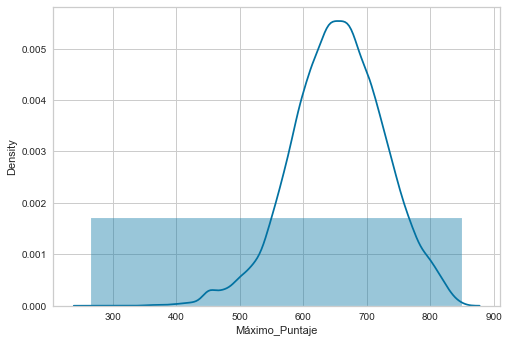

In [39]:
sns.distplot(data['Máximo_Puntaje'], bins= 1)

## comprobación de supuestos (StatsModel)

In [40]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [41]:
from scipy import stats
shapiro_test = stats.shapiro(res.resid)
shapiro_test

ShapiroResult(statistic=0.9953474402427673, pvalue=1.0247572307530671e-29)

Interpretación de shapiro-Wilk:
La hipotesis nula (H0) es que los datos se distribuyen de manera nornal, si el p-valor es menor a 0.05 (nvl de significancia) la hipotesis nula es aceptada, por tanto se concluye la distribución de datos si es de una distribución normal

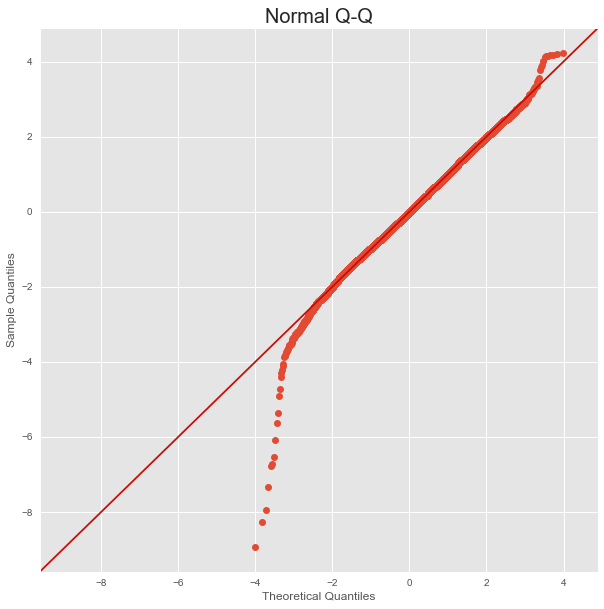

In [42]:
## Normalidad de los residuos
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(res.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black')
plt.title('Normal Q-Q', fontsize=20)

plt.show()

In [43]:
# Multicolinealidad (Calcularemos el VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = modelo1.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

[147.2494541729666,
 1.2349276857286062,
 4.807875097042563,
 4.987966387785724,
 1.0778109541543663,
 1.0440695466445158,
 1.027524743700981,
 1.0252113600147719,
 1.0727856441985704,
 1.1195770988674199,
 1.0762162044453034,
 1.029124574069971,
 1.0516986326593616,
 1.1997269752938857,
 1.0521755841647764,
 1.0248598446912196,
 1.1676472263071356,
 1.1316219841646813,
 1.073871741845168,
 1.091520010991506,
 1.3627891403581849,
 1.346386137267281]

El valor VIF es un resultado que nos explica la multicolinealidad de cada una de las variables, donde las columnas (variables) con un valor mayor a 5 o muy cercanas presentan indicios de multicolinealidad por tanto deben ser eliminadas del modelo o transformadas

Otra forma de ver este supuesto consiste en analizar el mapa de correlaciones para determinar que variables estan fuertemente correlacionadas entre ellas.

## Homocedasticidad

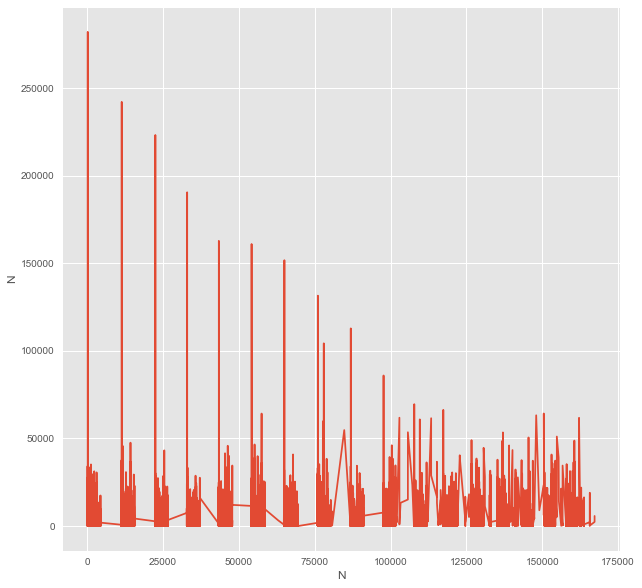

In [44]:
#1 - Homocedasticidad de los residuos (diferencia entre lo estimado y lo real)
# Los residuos se deben distribuir de manera homogenea 
# Analisis visual de la distribución de los errores (no cuadraticos)
plt.figure(1)
#plt.plot(res.resid)
plt.plot(res.resid**2)
plt.xlabel('N')
plt.ylabel('N')
plt.grid(True)
plt.show()

In [45]:
# Heterocedasticidad (Test breusch pagan)
breuschpagan_p= sms.het_breuschpagan(res.resid, res.model.exog)[1]
print(breuschpagan_p)
if breuschpagan_p> 0.05:
  print("La relación no es heterocedástica")
if breuschpagan_p <0.05:
  print("La relación es heterocedastica")

#El valor p es lo suficientemente pequeño como para rechazar la hipótesis nula de que la varianza de los residuos 
#no depende de los valores de las variables de entrada. Por tanto, se supone que existe heterocedasticidad.

0.0
La relación es heterocedastica


## Linealidad

Text(0, 0.5, 'Residuals')

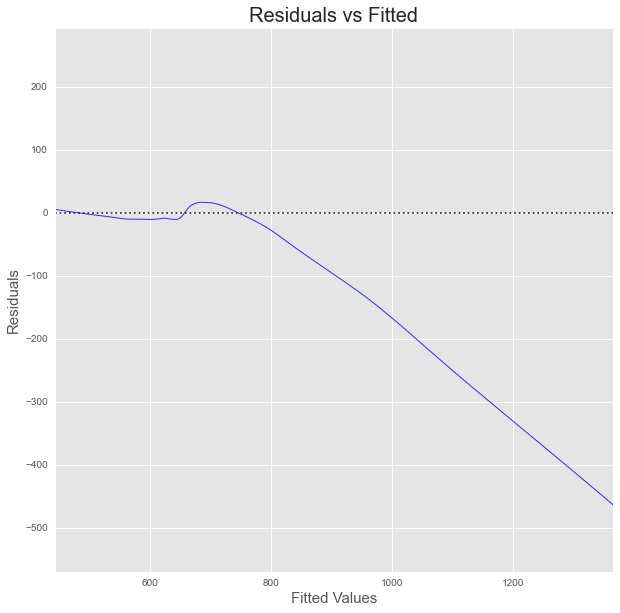

In [46]:
#Linealidad
sns.residplot(res.fittedvalues, 'Máximo_Puntaje', data=data, 
                          lowess=True, 
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

<AxesSubplot:title={'center':'Correlación de Pearson para las Features'}>

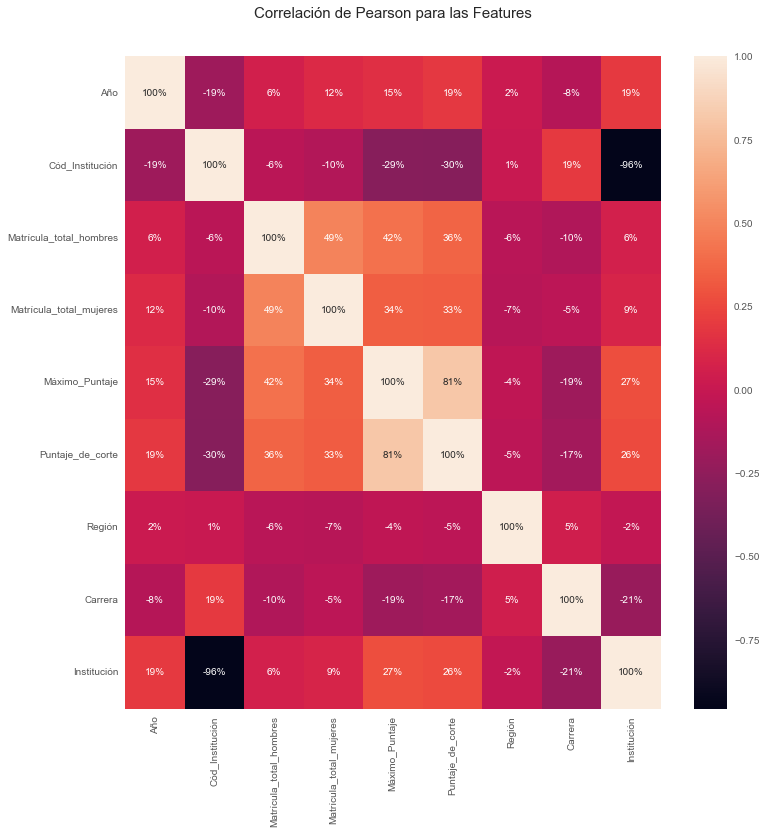

In [49]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación de Pearson para las Features', y=1.05, size=15)

sns.heatmap(data.corr(),annot=True,fmt='.0%')